# Quantitative Macroeconomics - Problem Set 2 - Exercise 2

### Ignasi Merediz-Solà

### Prof. Raül Santaeulàlia-Llopis

In [14]:
# We first import the required (and some other) packages
import pandas as pd
import numpy as np
import mpmath as mp
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import LinearConstraint, minimize, fsolve
import seaborn as sb

In [15]:
# Definition of the parameters

A_f = 1 # Produtivity factor which equal for both type of workers
# A_nf = 1
ρ = 1.1 # Parameter of the utility function
κ_f = 0.2 # Cost of worker at the workplace
κ_nf = 0.2 # Cost of teleworker
ω = 20 # How much the planer cares about the number of deaths
γ = 0.9 # Infections translate into deaths of employed individuals according to rate 1 - γ
i_0 = 0.2 # Initial share of infections at work
N = 1  # Ex-ante identical individuals

In [16]:
x_coords, y_coords = np.meshgrid(np.arange(0,101,1), np.arange(0,101,1), indexing='xy')
x_coords = x_coords * 0.01
y_coords = y_coords * 0.01
coordinate_grid = np.array([x_coords, y_coords])
coordinate_grid_2 = coordinate_grid[0]

In [17]:
results = coordinate_grid.copy()
output = coordinate_grid_2.copy()
welfare = coordinate_grid_2.copy()
infections = coordinate_grid_2.copy()
deaths = coordinate_grid_2.copy()


for z in np.arange(0,101,1):
    for y in np.arange(0,101,1):

        c_tw, β_hc = coordinate_grid[:, z, y]

        Y = lambda H_f, H_nf:(A_f * (H_f ** ((ρ - 1) / ρ)) + c_tw * A_f * (H_nf ** ((ρ - 1) / ρ))) ** (ρ / (ρ - 1))
        
        I = lambda H_f: β_hc * ((i_0*H_f) / N) * H_f

        D = lambda H_f: (1 - γ) * I (H_f)

        def objective_func(x):
            H_f = x[0]
            H_nf = x[1]
            return -1*(Y(H_f, H_nf)- κ_f * H_f - κ_nf * H_nf - ω * D(H_f))

        #initial guess
        x0 = np.array([0.5, 0.5])

        #Constraints
        A = np.array([-1, -1])
        b = np.array([-N])
        bnds = [(0, 1), (0, 1)]

        # Optimization

        con1 = {"type" : "ineq", "fun" : lambda x: A @ x - b}

        solution = minimize(objective_func, x0, method="SLSQP", bounds=bnds, constraints=con1)
        results[:, z, y] = solution.x
        
        #In order to plot the required figures
        output[z, y] = (A_f * (results[0, z, y] ** ((ρ - 1) / ρ)) + c_tw * A_f * (results[1, z, y] ** ((ρ - 1) / ρ))) ** (ρ / (ρ - 1))
        infections[z, y] = β_hc * ((i_0*results[0, z, y]) / N) * results[0, z, y]
        deaths[z, y] = (1 - γ) * infections[z, y]
        welfare[z, y] = output[z, y] - κ_f * results[0, z, y] - κ_nf * results[1, z, y] - ω * deaths[z, y]

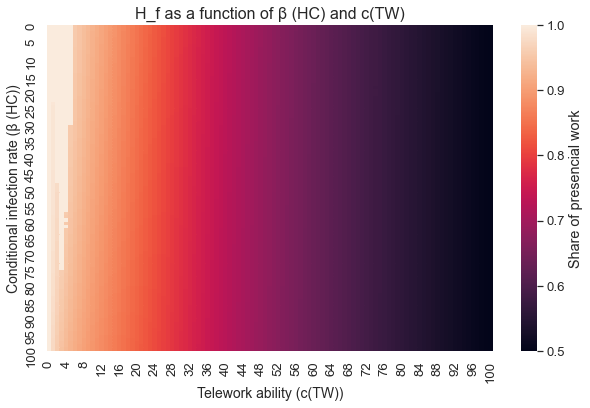

In [18]:
# Plot H_f
H_f = results[0]

plt.figure(figsize=(10,6))
sb.set(font_scale=1.2)
sb.heatmap(H_f, cbar_kws={'label': 'Share of presencial work'})

plt.xlabel('Telework ability (c(TW))', fontdict={'fontsize':14})
plt.ylabel('Conditional infection rate (β (HC))', fontdict={'fontsize':14})
plt.title('H_f as a function of β (HC) and c(TW)', fontdict={'fontsize':16})


plt.show()

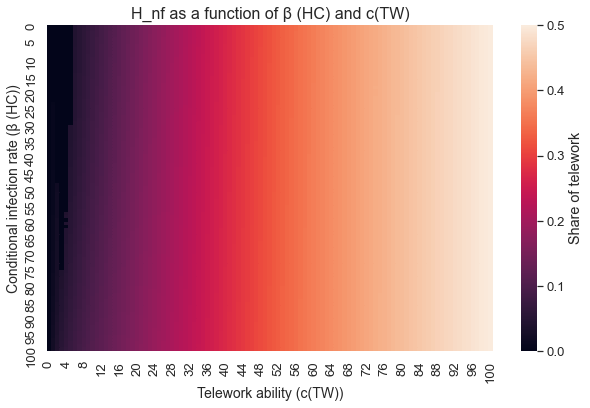

In [19]:
# Plot H_nf
H_nf = results[1]

plt.figure(figsize=(10,6))
sb.set(font_scale=1.2)
sb.heatmap(H_nf, cbar_kws={'label': 'Share of telework'})

plt.xlabel('Telework ability (c(TW))', fontdict={'fontsize':14})
plt.ylabel('Conditional infection rate (β (HC))', fontdict={'fontsize':14})
plt.title('H_nf as a function of β (HC) and c(TW)', fontdict={'fontsize':16})

plt.show()

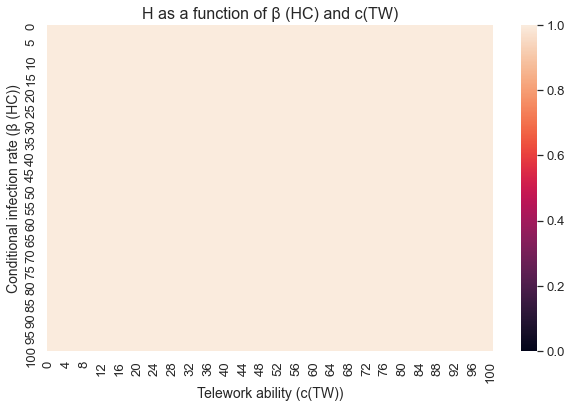

In [20]:
# Plot H

H = np.array(results[0] + results[1])

plt.figure(figsize=(10,6))
sb.set(font_scale=1.2)
sb.heatmap(H, cbar_kws={'label': ''}, vmin=0, vmax=1)

plt.xlabel('Telework ability (c(TW))', fontdict={'fontsize':14})
plt.ylabel('Conditional infection rate (β (HC))', fontdict={'fontsize':14})
plt.title('H as a function of β (HC) and c(TW)', fontdict={'fontsize':16})

plt.show()

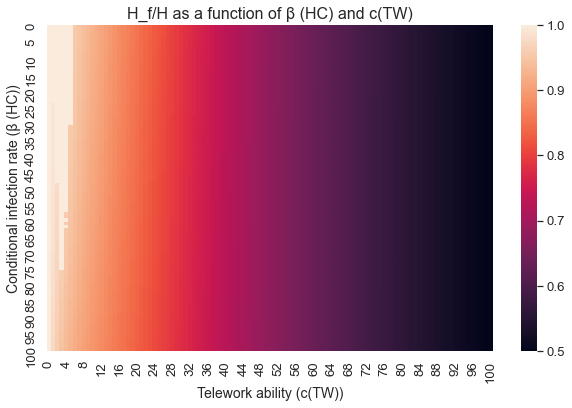

In [21]:
# Plot H_f ratio

H_f_ratio = np.array(H_f/H)

plt.figure(figsize=(10,6))
sb.set(font_scale=1.2)
sb.heatmap(H_f_ratio, cbar_kws={'label': ''})

plt.xlabel('Telework ability (c(TW))', fontdict={'fontsize':14})
plt.ylabel('Conditional infection rate (β (HC))', fontdict={'fontsize':14})
plt.title('H_f/H as a function of β (HC) and c(TW)', fontdict={'fontsize':16})

plt.show()

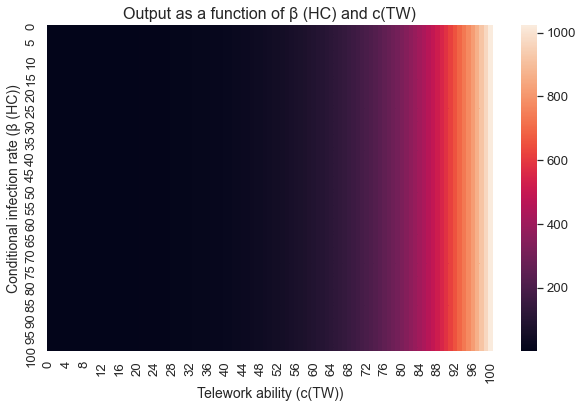

In [22]:
# Plot Output

plt.figure(figsize=(10,6))
sb.set(font_scale=1.2)
sb.heatmap(output, cbar_kws={'label': ''})

plt.xlabel('Telework ability (c(TW))', fontdict={'fontsize':14})
plt.ylabel('Conditional infection rate (β (HC))', fontdict={'fontsize':14})
plt.title('Output as a function of β (HC) and c(TW)', fontdict={'fontsize':16})

plt.show()

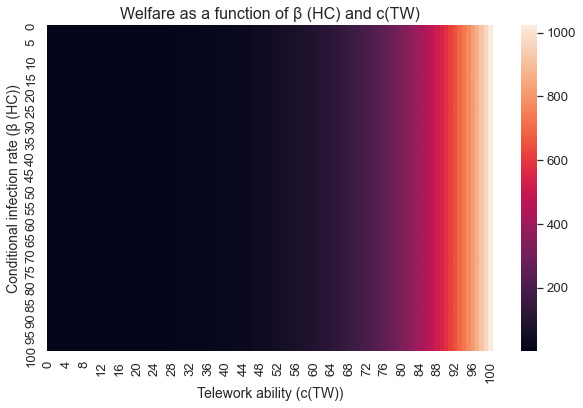

In [23]:
# Plot Welfare

plt.figure(figsize=(10,6))
sb.set(font_scale=1.2)
sb.heatmap(welfare, cbar_kws={'label': ''})

plt.xlabel('Telework ability (c(TW))', fontdict={'fontsize':14})
plt.ylabel('Conditional infection rate (β (HC))', fontdict={'fontsize':14})
plt.title('Welfare as a function of β (HC) and c(TW)', fontdict={'fontsize':16})

plt.show()

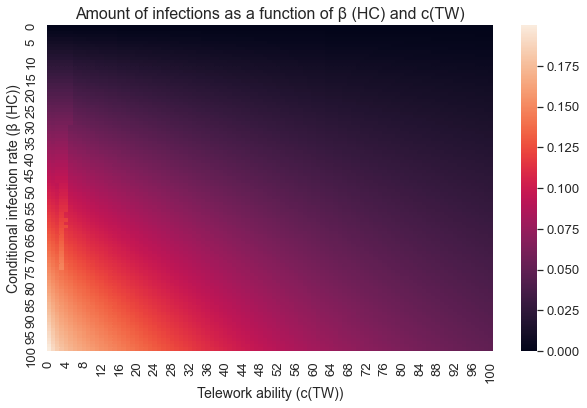

In [24]:
# Plot Infections

plt.figure(figsize=(10,6))
sb.set(font_scale=1.2)
sb.heatmap(infections, cbar_kws={'label': ''})

plt.xlabel('Telework ability (c(TW))', fontdict={'fontsize':14})
plt.ylabel('Conditional infection rate (β (HC))', fontdict={'fontsize':14})
plt.title('Amount of infections as a function of β (HC) and c(TW)', fontdict={'fontsize':16})

plt.show()

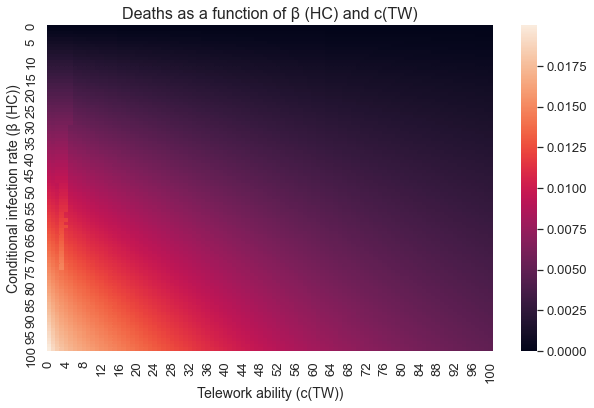

In [25]:
# Plot Deahts

plt.figure(figsize=(10,6))
sb.set(font_scale=1.2)
sb.heatmap(deaths, cbar_kws={'label': ''})

plt.xlabel('Telework ability (c(TW))', fontdict={'fontsize':14})
plt.ylabel('Conditional infection rate (β (HC))', fontdict={'fontsize':14})
plt.title('Deaths as a function of β (HC) and c(TW)', fontdict={'fontsize':16})

plt.show()